In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

$\large{\text{Question 1}}$

$\text{Part A}$

\begin{equation}
    T = 4600K\left(\frac{1}{0.92(B-V)+1.7}+\frac{1}{0.92(B-V)+0.62}\right)
\end{equation}

In [2]:
def temperature(B, V):
    a = 1/(0.92 * (B-V) + 1.7)
    b = 1/(0.92 * (B-V) + 0.62)
    return 4600 * (a + b)

In [3]:
V = np.array([
    11.389,
    10.894,
    9.459,
    14.401,
    11.635
])

In [4]:
B = np.array([
    11.87,
    12.303,
    9.656,
    15.248,
    12.744
])

In [5]:
T = np.zeros(5)

for i in range(5):
    T[i] = temperature(B[i], V[i])

In [6]:
for a, value in enumerate(T):
    print("Star", a+1, ':', np.round(value, 3), 'K')

Star 1 : 6476.335 K
Star 2 : 3935.721 K
Star 3 : 8186.297 K
Star 4 : 5142.906 K
Star 5 : 4495.402 K


$\large{\text{Question 1}}$

$\text{Part C }\&\text{ F}$

In [7]:
print('B-V')

for i in range(5):
    print('Star', i+1, ':', np.round(B[i]-V[i], 3))

B-V
Star 1 : 0.481
Star 2 : 1.409
Star 3 : 0.197
Star 4 : 0.847
Star 5 : 1.109


The B-V values from above would indicate the stars have the following absolute magnitudes and spectral types:

|Star | $M_V$| Spec. Type|
|---|---|:---:|
|1|1.2|A2|
|2|9|M0|
|3|2|A5|
|4|5.9|K0|
|5|7.3|K5|

$\large{\text{Question 1}}$

$\text{Part D}$

\begin{align}
L_\odot &= 3.85\times10^{26}W\\
M_\odot &= 4.85\\
\\
L_* &= L_\odot 10^{~(M_\odot-M_*)~/~2.5}
\end{align}

In [8]:
def luminosity(M):
    return L_sun * 10 ** ((M_sun - M) / 2.5)

In [9]:
L_sun = 3.85e26
M_sun = 4.85

L = []
M = np.array([1.2, 9, 2, 5.9, 7.3])

In [10]:
for i in M:
    L.append(luminosity(i))

In [11]:
print('Luminosity')

for i in range(5):
    print('Star', i+1, ':', '%3e' % L[i], 'W')

Luminosity
Star 1 : 1.110352e+28 W
Star 2 : 8.422882e+24 W
Star 3 : 5.314479e+27 W
Star 4 : 1.463729e+26 W
Star 5 : 4.031445e+25 W


$\large{\text{Question 1}}$

$\text{Part E}$

\begin{align}
L &= 4\pi r^2\sigma T^4\\[0.25em]
r &= \sqrt{\frac{L}{4\pi\sigma T^4}}
\end{align}

In [12]:
def radius(L, T):
    return np.sqrt(L / (4 * np.pi * σ * T**4))

In [13]:
σ = 5.67e-8
r = []

for i in range(5):
    r.append(radius(L[i], T[i]))

In [14]:
print('Radius')

for i in range(5):
    print('Star', i+1, ':', np.round(r[i], 3), 'm')

Radius
Star 1 : 2976290570.374 m
Star 2 : 221965373.093 m
Star 3 : 1288721007.379 m
Star 4 : 541896930.915 m
Star 5 : 372217598.536 m


$\large{\text{Question 2}}$

\begin{align}
m-M &= 5~\log d-5\\[0.25em]
\log d &= \frac{m-M+5}{5}\\[0.25em]
d &= 10^{~(m-M+5)~/~5}
\end{align}

In [15]:
def distance(m, M):
    return 10 ** ((m - M + 5) / 5)

In [16]:
d = []
M = np.array([1.2, 9, 2, 5.9, 7.3])

for i in range(5):
    d.append(distance(V[i], M[i]))

In [17]:
print('Distance')

for i in range(5):
    print('Star', i+1, ':', np.round(d[i], 3), 'pc')

Distance
Star 1 : 1090.938 pc
Star 2 : 23.922 pc
Star 3 : 310.313 pc
Star 4 : 501.418 pc
Star 5 : 73.621 pc


In [18]:
# quoted parallax disance
d_parallax = np.array([
    1530,
    1930,
    3070,
    1600,
    1400
])

In [19]:
print('Error in Distance')

for i in range(5):
    print('Star', i+1, ':',\
          np.round(100 - (d[i]/d_parallax[i] * 100), 3),\
          '%')

Error in Distance
Star 1 : 28.697 %
Star 2 : 98.761 %
Star 3 : 89.892 %
Star 4 : 68.661 %
Star 5 : 94.741 %


$\large{\text{Question 3}}$

$\text{Part A}$

\begin{align}
m-M &= 5~\log d-5-A\\[0.25em]
M &= m + 5 + A - 5~\log d \\[0.25em]
\text{where}\hspace{20pt} A_V &=0.6~\frac{r}{1000~pc}
\end{align}

In [20]:
def A_V(r):
    return 0.6 * r / 1000

In [21]:
def M_extinction(m, r, d):
    return m + 5 + A_V(r) - 5 * np.log10(d)

In [22]:
M_corrected = []

for i in range(5):
    M_corrected.append(M_extinction(V[i], d[i], d[i]))

In [23]:
print('Extinction Corrected Absolute Magnitude')

for i in range(5):
    print('Star', i+1, ':', np.round(M_corrected[i], 3))

Extinction Corrected Absolute Magnitude
Star 1 : 1.855
Star 2 : 9.014
Star 3 : 2.186
Star 4 : 6.201
Star 5 : 7.344


$\large{\text{Question 3}}$

$\text{Part B}$

\begin{equation}
T=4600K\left(\frac{1}{0.92~M + 1.7}+\frac{1}{0.92~M+0.62}\right)
\end{equation}

In [24]:
def T_extinction(M):
    a = 1/(0.92 * M + 1.7)
    b = 1/(0.92 * M + 0.62)
    return 4600 * (a + b)

In [25]:
T_corrected = []

for i in range(5):
    T_corrected.append(T_extinction(M_corrected[i]))

In [26]:
print('Extinction Corrected Temperature')

for i in range(5):
    print('Star', i+1, ':', np.round(T_corrected[i], 3), 'K')

Extinction Corrected Temperature
Star 1 : 3327.955 K
Star 2 : 976.401 K
Star 3 : 2987.65 K
Star 4 : 1348.518 K
Star 5 : 1167.542 K


$\large{\text{Question 3}}$

$\text{Part C}$

In [27]:
L_corrected = []

for i in M_corrected:
    L_corrected.append(luminosity(i))

In [28]:
print('Extinction Corrected Luminosity')

for i in range(5):
    print('Star', i+1, ':', '%3e' % L_corrected[i], 'W')

Extinction Corrected Luminosity
Star 1 : 6.076250e+27 W
Star 2 : 8.312266e+24 W
Star 3 : 4.476985e+27 W
Star 4 : 1.109482e+26 W
Star 5 : 3.870720e+25 W


$\large{\text{Question 3}}$

$\text{Part D}$

In [29]:
r_corrected = []

for i in range(5):
    r_corrected.append(radius(L_corrected[i], T_corrected[i]))

In [30]:
print('Extinction Corrected Radius')

for i in range(5):
    print('Star', i+1, ':', np.round(r_corrected[i], 3), 'm')

Extinction Corrected Radius
Star 1 : 8338085867.586 m
Star 2 : 3582670151.825 m
Star 3 : 8880487193.615 m
Star 4 : 6861994323.086 m
Star 5 : 5406979011.026 m


$\large{\text{Question 3}}$

$\text{Part E}$

Extinction Corrected Spectral Type:

|Star|Spec. Type|
|---|:---:|
|1|A5|
|2|M0|
|3|A5|
|4|K0|
|5|K5|

$\large{\text{Question 1}}$

$\text{Part B}$

\begin{align}
f_\lambda &= \frac{2hc^2}{\lambda^5}\frac{\lambda}{\exp(hc~/~\lambda k_BT)-1}\\[0.25em]
f_\nu &= \frac{\lambda^2}{c} f_\lambda\\[0.25em]
M_{AB} &= -2.5\log_{~10}\left(\frac{f_\nu}{Jy}\right)+8.9\\[0.25em]
\text{where}\hspace{20pt}Jy &= 10^{-26}~Wm^{-2}Hz^{-1}
\end{align}

In [61]:
h = 6.6e-34
c = 3e8
k_B = 1.38e-23

def planck_bb(λ, T):
    
    F1 = 2 * h * c**2 / λ**5
    F2 = λ / (np.exp(h*c/(λ*k_B*T)) - 1)
    
    return F1 * F2

In [56]:
λ_filter = np.array([
    537.4e-9,
    433.45e-9,
    623.1e-9,
    770.6e-9
])

λ_filter.sort()
M_ab = []

λ_cont = np.linspace(1e-8, 1e-6, 100)

\begin{align}
m &=-2.5\log_{10}\left(\frac{f_{\nu}}{Jy}\right)+8.9\\
\frac{8.9-m}{2.5} &= \log_{10}\left(\frac{f_{\nu}}{Jy}\right)\\
f_{\nu} &= 10^{\left(\frac{8.9-m}{2.5}\right)}Jy
\end{align}

In [86]:
def flux(m):
    return 10**(8.9-m/2.5)

In [87]:
f_v = np.zeros(5)

for i in range(5):
    f_v[i] = (flux(V[i]))

In [88]:
f_λ = λ_filter[0]**2 * f_v / c

In [89]:
f_λ * 1e26

array([1.38406587e+09, 2.18351792e+09, 8.18760269e+09, 8.63687750e+07,
       1.10346042e+09])

Text(0,0.5,'$f_{\\lambda}}$')

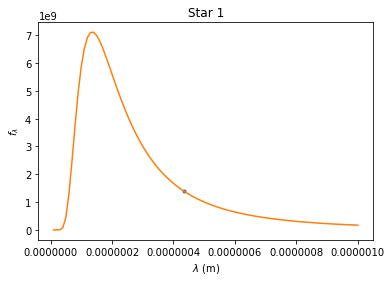

In [136]:
plt.plot(λ_filter[0], f_λ[0]*1e26, '.')
plt.plot(λ_cont, planck_bb(λ_cont, 27000))
plt.title('Star 1')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')
# plt.legend()

Text(0,0.5,'$f_{\\lambda}}$')

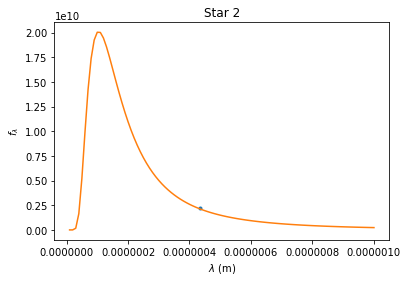

In [137]:
plt.plot(λ_filter[0], f_λ[1]*1e26, '.')
plt.plot(λ_cont, planck_bb(λ_cont, 35000))
plt.title('Star 2')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')
# plt.legend()

Text(0,0.5,'$f_{\\lambda}}$')

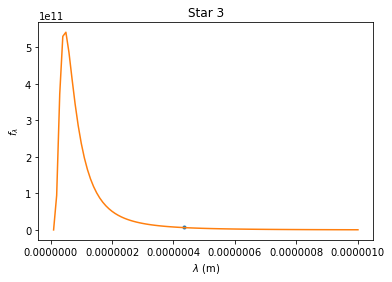

In [138]:
plt.plot(λ_filter[0], f_λ[2]*1e26, '.')
plt.plot(λ_cont, planck_bb(λ_cont, 80000))
plt.title('Star 3')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')
# plt.legend()

Text(0,0.5,'$f_{\\lambda}}$')

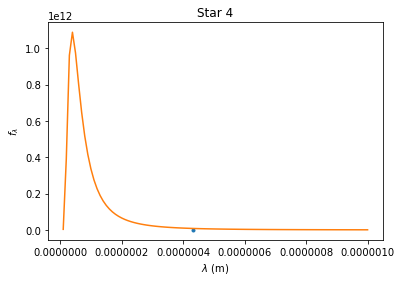

In [139]:
plt.plot(λ_filter[0], f_λ[3]*1e26, '.')
plt.plot(λ_cont, planck_bb(λ_cont, 95000))
plt.title('Star 4')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')
# plt.legend()

Text(0,0.5,'$f_{\\lambda}}$')

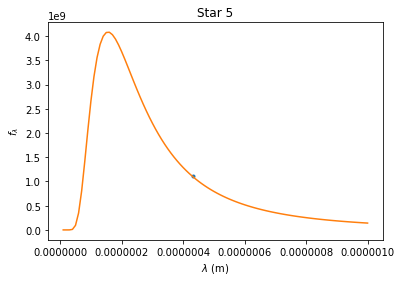

In [140]:
plt.plot(λ_filter[0], f_λ[4]*1e26, '.')
plt.plot(λ_cont, planck_bb(λ_cont, 23500))

plt.title('Star 5')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')
# plt.legend()

$\large{\text{Question 4}}$

$\text{Star 1}$

Text(0,0.5,'$f_{\\lambda}}$')

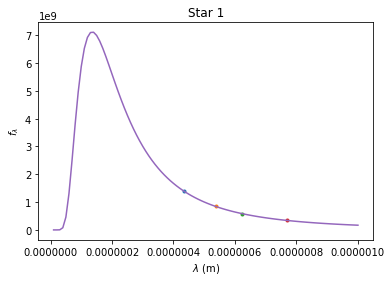

In [144]:
plt.plot(λ_filter[0], f_λ[0]*1e26, '.')
plt.plot(λ_filter[1], planck_bb(λ_filter[1], 27000), '.')
plt.plot(λ_filter[2], planck_bb(λ_filter[2], 27000), '.')
plt.plot(λ_filter[3], planck_bb(λ_filter[3], 27000), '.')

plt.plot(λ_cont, planck_bb(λ_cont, 27000))
plt.title('Star 1')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')

$\text{Star 2}$

Text(0,0.5,'$f_{\\lambda}}$')

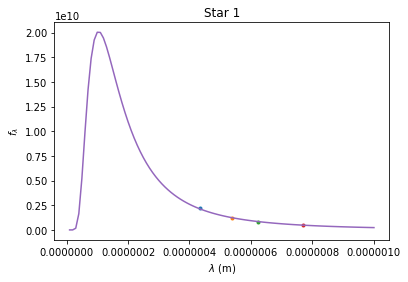

In [145]:
plt.plot(λ_filter[0], f_λ[1]*1e26, '.')
plt.plot(λ_filter[1], planck_bb(λ_filter[1], 35000), '.')
plt.plot(λ_filter[2], planck_bb(λ_filter[2], 35000), '.')
plt.plot(λ_filter[3], planck_bb(λ_filter[3], 35000), '.')

plt.plot(λ_cont, planck_bb(λ_cont, 35000))
plt.title('Star 1')
plt.xlabel(r'$\lambda$ (m)')
plt.ylabel(r'$f_{\lambda}}$')